In [2]:
import matplotlib.pyplot as plt
import numpy as np

import math

In [43]:
learning_rate = 5e-4
warmup_iters = 0

lr_decay_iters = 10000 #max_iters
min_lr = 5e-5

In [44]:
# learning rate decay scheduler (cosine with warmup)
def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if lr_decay_iters == 0:
        return learning_rate
    
    if it < warmup_iters:
        return learning_rate * it / warmup_iters
    # 2) if it > lr_decay_iters, return min learning rate
    if it > lr_decay_iters:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio))  # coeff ranges 0..1
    return min_lr + coeff * (learning_rate - min_lr)

In [47]:
lrs = [get_lr(it) for it in range(20000)]

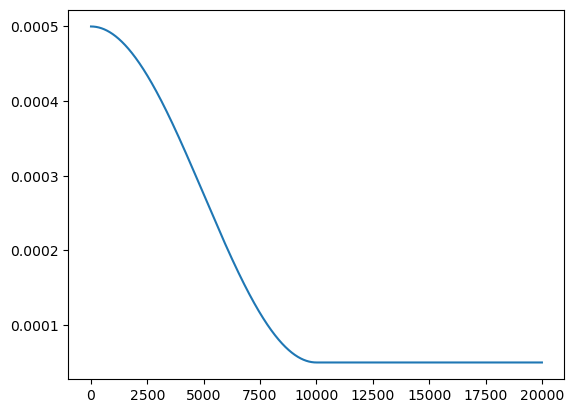

In [48]:
plt.plot(lrs)